# Import neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [130]:
import re

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [151]:
import seaborn as sns

In [78]:
from sklearn.decomposition import PCA
import pickle

# Preprocess the data

In [2]:
df = pd.read_csv('dataset/data.csv')

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,output
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#Check for duplicates
duplicates = df.duplicated()

In [5]:
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

In [7]:
#remove the duplicates
df = df[~duplicates]

In [8]:
df.to_csv('dataset/cleaned_data.csv')

In [15]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,output
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<AxesSubplot:>

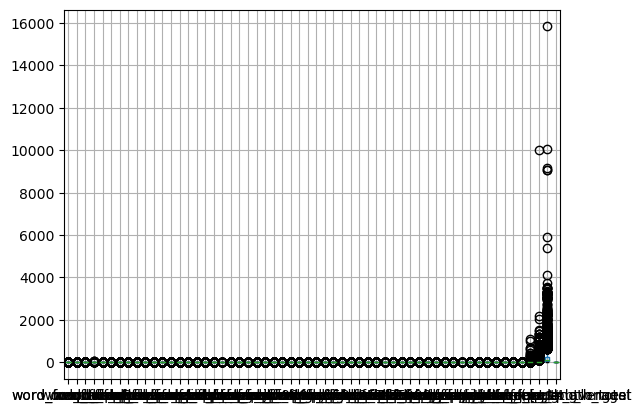

In [53]:
df.boxplot()

In [63]:
#remove the outliers
df = df.drop(df[df["capital_run_length_total"] > 3800].index)

<AxesSubplot:>

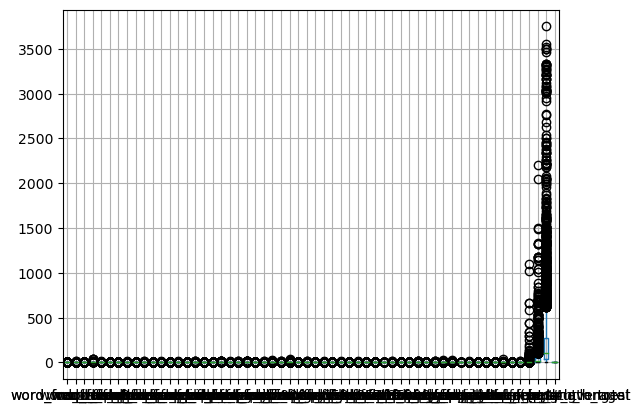

In [64]:
df.boxplot()

In [67]:
#seperate the inputs and output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [68]:
#balancing the dataset
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

In [69]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [70]:
len(df_resampled)

3346

In [75]:
#seperate the inputs and output
X = df_resampled.iloc[:, :-1].values
y = df_resampled.iloc[:, -1].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Models

## Apply PCA

In [117]:
pca = PCA(n_components=0.95)

In [118]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [120]:
#save the model
with open('models/pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)

## kNN Model

In [85]:
knn = KNeighborsClassifier()

In [98]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [99]:
#find the best hyper parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [100]:
#train
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [101]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


In [102]:
#make the knn model with the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                  weights=grid_search.best_params_['weights'],
                                  metric=grid_search.best_params_['metric'])

In [103]:
#train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [104]:
#test the model
y_pred_knn = knn_model.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       365
           1       0.75      0.89      0.81       305

    accuracy                           0.82       670
   macro avg       0.82      0.82      0.82       670
weighted avg       0.83      0.82      0.82       670



In [122]:
knn_pca = KNeighborsClassifier()

In [123]:
params_knn_pca = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [124]:
grid_knn_pca = GridSearchCV(knn_pca, params_knn_pca, cv=5)

In [125]:
grid_knn_pca.fit(X_train_pca, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [126]:
print("Best hyperparameters for KNN with PCA:", grid_knn_pca.best_params_)

Best hyperparameters for KNN with PCA: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


In [127]:
knn_pca_model = KNeighborsClassifier(**grid_knn_pca.best_params_)

In [128]:
#train the model with the pca dataset
knn_pca_model.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

In [129]:
#test with pca dataset
y_pred_knn_pca = knn_pca_model.predict(X_test_pca)

In [130]:
print(classification_report(y_test, y_pred_knn_pca))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       365
           1       0.67      0.79      0.72       305

    accuracy                           0.73       670
   macro avg       0.73      0.73      0.73       670
weighted avg       0.74      0.73      0.73       670



## Decision Tree Model

In [132]:
#config params for decision tree
param_grid_dt = {'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5]}

In [133]:
#find best hyperparameters for decision tree
best_accuracy = 0
for max_depth in param_grid_dt['max_depth']:
    for min_samples_split in param_grid_dt['min_samples_split']:
        for min_samples_leaf in param_grid_dt['min_samples_leaf']:
            clf = DecisionTreeClassifier(max_depth=max_depth, 
                                         min_samples_split=min_samples_split, 
                                         min_samples_leaf=min_samples_leaf, 
                                         random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'max_depth': max_depth, 
                               'min_samples_split': min_samples_split, 
                               'min_samples_leaf': min_samples_leaf}

In [134]:
#make model using the best hyperparameters
dt_model = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'], 
                                 min_samples_leaf=best_params['min_samples_leaf'], 
                                 random_state=42)

In [136]:
#train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [137]:
#test the model
y_pred_dt = dt_model.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       365
           1       0.91      0.86      0.88       305

    accuracy                           0.90       670
   macro avg       0.90      0.89      0.90       670
weighted avg       0.90      0.90      0.90       670



In [139]:
Z

In [141]:
best_accuracy = 0
for max_depth in param_grid_dt_pca['max_depth']:
    for min_samples_split in param_grid_dt_pca['min_samples_split']:
        for min_samples_leaf in param_grid_dt_pca['min_samples_leaf']:
            clf = DecisionTreeClassifier(max_depth=max_depth, 
                                         min_samples_split=min_samples_split, 
                                         min_samples_leaf=min_samples_leaf, 
                                         random_state=42)
            clf.fit(X_train_pca, y_train)
            y_pred = clf.predict(X_test_pca)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'max_depth': max_depth, 
                               'min_samples_split': min_samples_split, 
                               'min_samples_leaf': min_samples_leaf}

In [142]:
dt_pca_model = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'], 
                                 min_samples_leaf=best_params['min_samples_leaf'], 
                                 random_state=42)

In [143]:
#train model with pca dataset
dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [145]:
#test model with pca dataset
y_pred_dt_pca = dt_pca_model.predict(X_test_pca)

In [146]:
print(classification_report(y_test, y_pred_dt_pca))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       365
           1       0.68      0.73      0.70       305

    accuracy                           0.72       670
   macro avg       0.72      0.72      0.72       670
weighted avg       0.72      0.72      0.72       670



# Save Models

In [147]:
with open('models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [148]:
with open('models/knn_pca_model.pkl', 'wb') as f:
    pickle.dump(knn_pca_model, f)

In [149]:
with open('models/dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

In [150]:
with open('models/dt_pca_model.pkl', 'wb') as f:
    pickle.dump(dt_pca_model, f)

# Model Evaluation

In [155]:
#find the confusion matrix
kNN_cm = confusion_matrix(y_test, y_pred_knn)
kNN_cm_pca = confusion_matrix(y_test, y_pred_knn_pca)
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_cm_pca = confusion_matrix(y_test, y_pred_dt_pca)

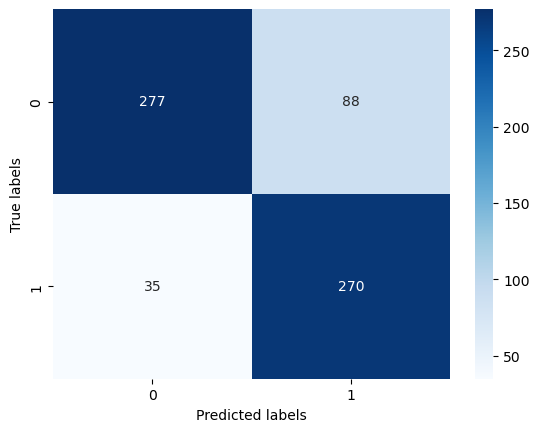

In [157]:
#visualize the confusion matrix
sns.heatmap(kNN_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

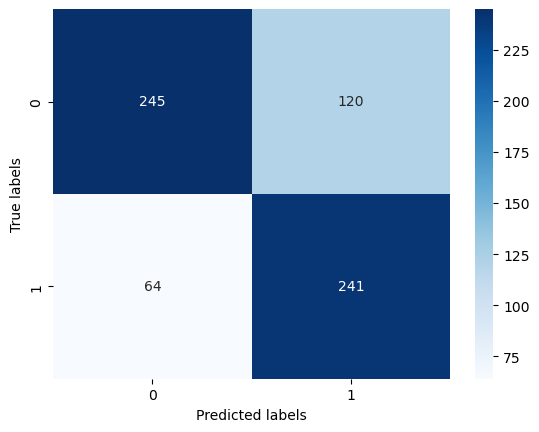

In [158]:
sns.heatmap(kNN_cm_pca, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

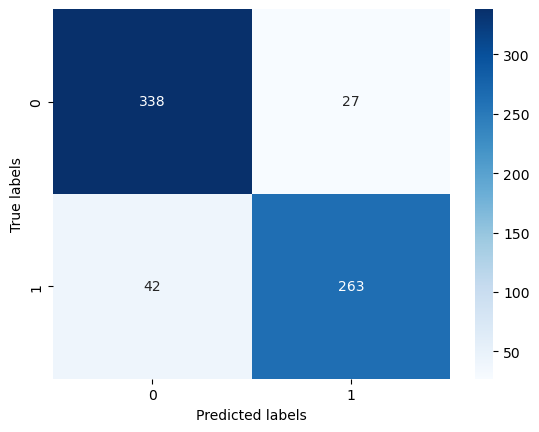

In [159]:
sns.heatmap(dt_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

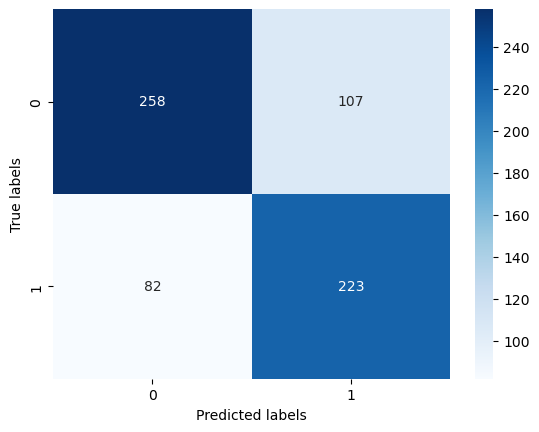

In [160]:
sns.heatmap(dt_cm_pca, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Experimental Results

In [59]:
#function to transform raw data to data that can be passed to the models
def data_transform(user_input):
    data = []
    words = user_input.lower().split()

    # count the frequency of the word 'make'
    make_count = words.count('make')
    address_count = words.count('address')
    all_count = words.count('all')
    d3_count = words.count('3d')
    our_count = words.count('our')
    over_count = words.count('over')
    remove_count = words.count('remove')
    internet_count = words.count('internet')
    order_count = words.count('order')
    mail_count = words.count('mail')
    receive_count = words.count('receive')
    will_count = words.count('will')
    people_count = words.count('people')
    report_count = words.count('report')
    addresses_count = words.count('addresses')
    free_count = words.count('free')
    business_count = words.count('business')
    email_count = words.count('email')
    you_count = words.count('you')
    credit_count = words.count('credit')
    your_count = words.count('your')
    font_count = words.count('font')
    n000_count = words.count('000')
    money_count = words.count('money')
    hp_count = words.count('hp')
    hpl_count = words.count('hpl')
    george_count = words.count('george')
    n650_count = words.count('650')
    lab_count = words.count('lab')
    labs_count = words.count('labs')
    telnet_count = words.count('telnet')
    n857_count = words.count('857')
    data_count = words.count('data')
    n415_count = words.count('415')
    n85_count = words.count('85')
    technology_count = words.count('technology')
    n1999_count = words.count('1999')
    parts_count = words.count('parts')
    pm_count = words.count('pm')
    direct_count = words.count('direct')
    cs_count = words.count('cs')
    meeting_count = words.count('meeting')
    original_count = words.count('original')
    project_count = words.count('project')
    re_count = words.count('re')
    edu_count = words.count('edu')
    table_count = words.count('table')
    conference_count = words.count('conference')
    
    # calculate the percentage of the total words
    total_words = len(words)
    data.append(100 * make_count / total_words)
    data.append(100 * address_count / total_words)
    data.append(100 * all_count / total_words)
    data.append(100 * d3_count / total_words)
    data.append(100 * our_count / total_words)
    data.append(100 * over_count / total_words)
    data.append(100 * remove_count / total_words)
    data.append(100 * internet_count / total_words)
    data.append(100 * order_count / total_words)
    data.append(100 * mail_count / total_words)
    data.append(100 * receive_count / total_words)
    data.append(100 * will_count / total_words)
    data.append(100 * people_count / total_words)
    data.append(100 * report_count / total_words)
    data.append(100 * addresses_count / total_words)
    data.append(100 * free_count / total_words)
    data.append(100 * business_count / total_words)
    data.append(100 * email_count / total_words)
    data.append(100 * you_count / total_words)
    data.append(100 * credit_count / total_words)
    data.append(100 * your_count / total_words)
    data.append(100 * font_count / total_words)
    data.append(100 * n000_count / total_words)
    data.append(100 * money_count / total_words)
    data.append(100 * hp_count / total_words)
    data.append(100 * hpl_count / total_words)
    data.append(100 * george_count / total_words)
    data.append(100 * n650_count / total_words)
    data.append(100 * lab_count / total_words)
    data.append(100 * labs_count / total_words)
    data.append(100 * telnet_count / total_words)
    data.append(100 * n857_count / total_words)
    data.append(100 * data_count / total_words)
    data.append(100 * n415_count / total_words)
    data.append(100 * n85_count / total_words)
    data.append(100 * technology_count / total_words)
    data.append(100 * n1999_count / total_words)
    data.append(100 * parts_count / total_words)
    data.append(100 * pm_count / total_words)
    data.append(100 * direct_count / total_words)
    data.append(100 * cs_count / total_words)
    data.append(100 * meeting_count / total_words)
    data.append(100 * original_count / total_words)
    data.append(100 * project_count / total_words)
    data.append(100 * re_count / total_words)
    data.append(100 * edu_count / total_words)
    data.append(100 * table_count / total_words)
    data.append(100 * conference_count / total_words)
    

    # count the frequency of the character '['
    count_semi = user_input.count(';')
    count_bracket = user_input.count('(')
    count_square_bracket = user_input.count('[')
    count_not = user_input.count('!')
    count_dollar = user_input.count('$')
    count_hash = user_input.count('#')

    # calculate the percentage of the total characters
    total_chars = len(user_input)
    data.append(100 * count_semi / total_chars)
    data.append(100 * count_bracket / total_chars)
    data.append(100 * count_square_bracket / total_chars)
    data.append(100 * count_not/ total_chars)
    data.append(100 * count_dollar / total_chars)
    data.append(100 * count_hash / total_chars)
              
    # find all sequences of capital letters
    capital_sequences = re.findall(r'[A-Z]+', user_input)

    # calculate the total number of capital letters
    capital_total = sum(len(seq) for seq in capital_sequences)

    # calculate the average length of uninterrupted sequences of capital letters
    if capital_sequences:
        capital_longest = max(capital_sequences, key=len)
        capital_avg = sum(len(seq) for seq in capital_sequences) / len(capital_sequences)
    else:
        capital_longest = 0
        capital_avg = 0  
        
    data.append(capital_avg)
    data.append(len(capital_longest))
    data.append(capital_total)
                                       
    return data

In [38]:
#load the models
with open('models/knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

In [126]:
with open('models/dt_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)

In [122]:
user_input = input("Paste the email here:\n")

Paste the email here:
Dear John,  I hope this email finds you well. I wanted to touch base with you regarding the project we discussed last week. I have attached the latest version of the project report for your review.   Please let me know if you have any feedback or suggestions. I'm looking forward to hearing your thoughts.  Best regards, Jane


In [123]:
data = data_transform(user_input)

In [124]:
y_pred = knn_model.predict([data])

In [125]:
y_pred

array([0], dtype=int64)

In [127]:
y_pred = dt_model.predict([data])

In [128]:
y_pred

array([0], dtype=int64)